In [1]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.utils.ensemble import sorted_neurons
from nengo.utils.matplotlib import rasterplot

In [2]:
model = nengo.Network(label="Many Neurons")
with model:
    # Our ensemble consists of 100 leaky integrate-and-fire neurons,
    # representing a one-dimensional signal
    A = nengo.Ensemble(100, dimensions=1)

In [3]:
with model:
    sin = nengo.Node(lambda t: np.sin(8 * t))  # Input is a sine

In [4]:
with model:
    # Connect the input to the population
    nengo.Connection(sin, A, synapse=0.01)  # 10ms filter

In [5]:
with model:
    # Add probes to record data
    A_probe = nengo.Probe(A)         # Probe for the ensemble output
    sin_probe = nengo.Probe(sin)     # Probe for the input node
    A_spikes = nengo.Probe(A.neurons) # Probe for spikes

In [6]:
# Create our simulator
with nengo.Simulator(model) as sim:
    # Run it for 1 seconds
    sim.run(300)
    # After running, you can access sim.data[A_probe], sim.data[sin_probe], sim.data[A_spikes]

Build finished in 0:00:01.                                                      

Simulation finished in 0:00:10.                                                 
Simulation finished in 0:00:10.                                                 


(0.0, 1.0)

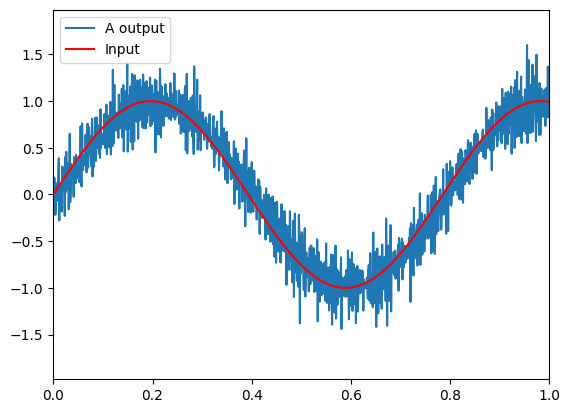

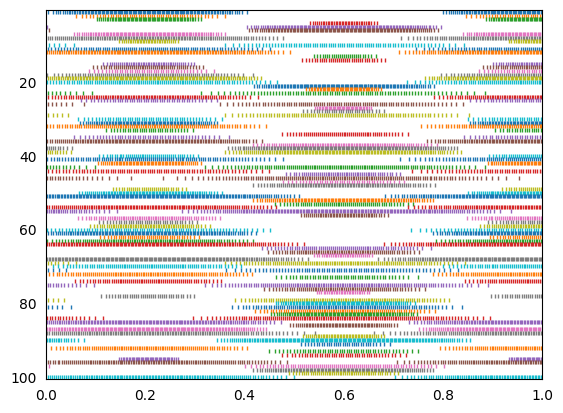

In [7]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label="A output")
plt.plot(sim.trange(), sim.data[sin_probe], "r", label="Input")
plt.xlim(0, 1)
plt.legend()

# Plot the spiking output of the ensemble
plt.figure()
rasterplot(sim.trange(), sim.data[A_spikes])
plt.xlim(0, 1)

(0.0, 1.0)

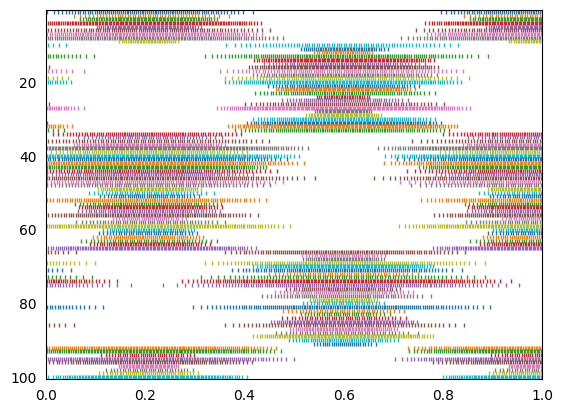

In [8]:
# For interest's sake, you can also sort by encoder
indices = sorted_neurons(A, sim, iterations=250)
plt.figure()
rasterplot(sim.trange(), sim.data[A_spikes][:, indices])
plt.xlim(0, 1)